STAT 479: Deep Learning (Spring 2019)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  
Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat479-ss2019/  
GitHub repository: https://github.com/rasbt/stat479-deep-learning-ss19

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p torch

Sebastian Raschka 

CPython 3.7.1
IPython 7.2.0

torch 1.0.1


- Runs on CPU or GPU (if available)

# Logistic Regression with L2 Regularization

Implementation of *classic* logistic regression for binary class labels.

## Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn.functional as F

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
LAMBDA = 2

## Preparing a toy dataset

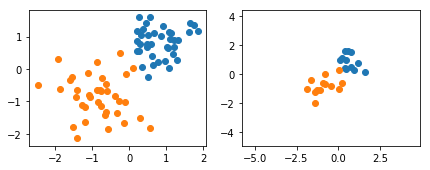

In [3]:
##########################
### DATASET
##########################

data = np.genfromtxt('data/toydata.txt', delimiter='\t')
x = data[:, :2].astype(np.float32)
y = data[:, 2].astype(np.int64)

np.random.seed(123)
idx = np.arange(y.shape[0])
np.random.shuffle(idx)
X_test, y_test = x[idx[:25]], y[idx[:25]]
X_train, y_train = x[idx[25:]], y[idx[25:]]
mu, std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_train, X_test = (X_train - mu) / std, (X_test - mu) / std

fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
ax[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1])
ax[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1])
ax[1].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1])
ax[1].scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1])
plt.xlim([x[:, 0].min()-0.5, x[:, 0].max()+0.5])
plt.ylim([x[:, 1].min()-0.5, x[:, 1].max()+0.5])
plt.show()

<br>
<br>
<br>

## L2-Regularized Logistic Regression via `weight_decay`

In [4]:
def custom_where(cond, x_1, x_2):
    return (cond * x_1) + ((1-cond) * x_2)


class LogisticRegression(torch.nn.Module):

    def __init__(self, num_features):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(num_features, 1)
        # initialize weights to zeros here,
        # since we used zero weights in the
        # manual approach
        
        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()
        # Note: the trailing underscore
        # means "in-place operation" in the context
        # of PyTorch
        
    def forward(self, x):
        logits = self.linear(x)
        probas = torch.sigmoid(logits)
        return probas

model = LogisticRegression(num_features=2).to(device)

#########################################################
## Apply L2 regularization
optimizer = torch.optim.SGD(model.parameters(), 
                            lr=0.1, 
                            weight_decay=LAMBDA)
#-------------------------------------------------------


def comp_accuracy(label_var, pred_probas):
    pred_labels = custom_where((pred_probas > 0.5).float(), 1, 0).view(-1)
    acc = torch.sum(pred_labels == label_var.view(-1)).float() / label_var.size(0)
    return acc


num_epochs = 30

X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device).view(-1, 1)


for epoch in range(num_epochs):
    
    #### Compute outputs ####
    out = model(X_train_tensor)
    
    #### Compute gradients ####
    cost = F.binary_cross_entropy(out, y_train_tensor, reduction='sum')
    optimizer.zero_grad()
    cost.backward()
    
    #### Update weights ####  
    optimizer.step()
    
    #### Logging ####      
    pred_probas = model(X_train_tensor)
    acc = comp_accuracy(y_train_tensor, pred_probas)
    print('Epoch: %03d' % (epoch + 1), end="")
    print(' | Train ACC: %.3f' % acc, end="")
    print(' | Cost: %.3f' % F.binary_cross_entropy(pred_probas, y_train_tensor))


    
print('\nModel parameters:')
print('  Weights: %s' % model.linear.weight)
print('  Bias: %s' % model.linear.bias)


X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

pred_probas = model(X_test_tensor)
test_acc = comp_accuracy(y_test_tensor, pred_probas)

print('\n\nTest set accuracy: %.2f%%' % (test_acc*100))

Epoch: 001 | Train ACC: 0.973 | Cost: 0.055
Epoch: 002 | Train ACC: 0.973 | Cost: 0.065
Epoch: 003 | Train ACC: 0.973 | Cost: 0.080
Epoch: 004 | Train ACC: 0.973 | Cost: 0.094
Epoch: 005 | Train ACC: 0.973 | Cost: 0.104
Epoch: 006 | Train ACC: 0.973 | Cost: 0.108
Epoch: 007 | Train ACC: 0.973 | Cost: 0.110
Epoch: 008 | Train ACC: 0.973 | Cost: 0.111
Epoch: 009 | Train ACC: 0.973 | Cost: 0.112
Epoch: 010 | Train ACC: 0.973 | Cost: 0.112
Epoch: 011 | Train ACC: 0.973 | Cost: 0.112
Epoch: 012 | Train ACC: 0.973 | Cost: 0.112
Epoch: 013 | Train ACC: 0.973 | Cost: 0.112
Epoch: 014 | Train ACC: 0.973 | Cost: 0.112
Epoch: 015 | Train ACC: 0.973 | Cost: 0.112
Epoch: 016 | Train ACC: 0.973 | Cost: 0.112
Epoch: 017 | Train ACC: 0.973 | Cost: 0.112
Epoch: 018 | Train ACC: 0.973 | Cost: 0.112
Epoch: 019 | Train ACC: 0.973 | Cost: 0.112
Epoch: 020 | Train ACC: 0.973 | Cost: 0.112
Epoch: 021 | Train ACC: 0.973 | Cost: 0.112
Epoch: 022 | Train ACC: 0.973 | Cost: 0.112
Epoch: 023 | Train ACC: 0.973 | 

## L2-Regularized Logistic Regression via Manual Regularization

In [5]:
model = LogisticRegression(num_features=2).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(num_epochs):
    
    #### Compute outputs ####
    out = model(X_train_tensor)
    
    #### Compute gradients ####
    
    #########################################################
    ## Apply L2 regularization (weight decay)
    cost = F.binary_cross_entropy(out, y_train_tensor, reduction='sum')
    cost = cost + 0.5 * LAMBDA * torch.mm(model.linear.weight,
                                          model.linear.weight.t())
    
    # note that PyTorch also regularizes the bias, hence, if we want
    # to reproduce the behavior of SGD's "weight_decay" param, we have to add
    # the bias term as well: 
    cost = cost + 0.5 * LAMBDA * model.linear.bias**2
    #-------------------------------------------------------
    
    optimizer.zero_grad()
    cost.backward()
    
    #### Update weights ####  
    optimizer.step()
    
    #### Logging ####      
    pred_probas = model(X_train_tensor)
    acc = comp_accuracy(y_train_tensor, pred_probas)
    print('Epoch: %03d' % (epoch + 1), end="")
    print(' | Train ACC: %.3f' % acc, end="")
    print(' | Cost: %.3f' % F.binary_cross_entropy(pred_probas, y_train_tensor))


    
print('\nModel parameters:')
print('  Weights: %s' % model.linear.weight)
print('  Bias: %s' % model.linear.bias)


X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

pred_probas = model(X_test_tensor)
test_acc = comp_accuracy(y_test_tensor, pred_probas)

print('\n\nTest set accuracy: %.2f%%' % (test_acc*100))

Epoch: 001 | Train ACC: 0.973 | Cost: 0.055
Epoch: 002 | Train ACC: 0.973 | Cost: 0.065
Epoch: 003 | Train ACC: 0.973 | Cost: 0.080
Epoch: 004 | Train ACC: 0.973 | Cost: 0.094
Epoch: 005 | Train ACC: 0.973 | Cost: 0.104
Epoch: 006 | Train ACC: 0.973 | Cost: 0.108
Epoch: 007 | Train ACC: 0.973 | Cost: 0.110
Epoch: 008 | Train ACC: 0.973 | Cost: 0.111
Epoch: 009 | Train ACC: 0.973 | Cost: 0.112
Epoch: 010 | Train ACC: 0.973 | Cost: 0.112
Epoch: 011 | Train ACC: 0.973 | Cost: 0.112
Epoch: 012 | Train ACC: 0.973 | Cost: 0.112
Epoch: 013 | Train ACC: 0.973 | Cost: 0.112
Epoch: 014 | Train ACC: 0.973 | Cost: 0.112
Epoch: 015 | Train ACC: 0.973 | Cost: 0.112
Epoch: 016 | Train ACC: 0.973 | Cost: 0.112
Epoch: 017 | Train ACC: 0.973 | Cost: 0.112
Epoch: 018 | Train ACC: 0.973 | Cost: 0.112
Epoch: 019 | Train ACC: 0.973 | Cost: 0.112
Epoch: 020 | Train ACC: 0.973 | Cost: 0.112
Epoch: 021 | Train ACC: 0.973 | Cost: 0.112
Epoch: 022 | Train ACC: 0.973 | Cost: 0.112
Epoch: 023 | Train ACC: 0.973 | 

**Note: for easier comparison we plotted the regular cost, not the regularized cost (strictly, plotting the regularized cost is more useful as the regular ost may not always go down while making "progress")**